# Cars Dataset Analysis

<div class="alert alert-block alert-info">
Import the Python libraries to be used
</div>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
sns.set()

<b>Read in the large dataset from your home directory

In [2]:
df = pd.read_csv("car_features.csv", index_col=0, 
                 low_memory=False).transpose()

In [3]:
df.index = df.index.str.replace(' Specs: ', ' ')

<b> Preview the dataset

In [5]:
df.shape

(32316, 234)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32316 entries, 2019 Acura RDX FWD w/Technology Pkg to 2015 Volvo V60 Cross Country 2015.5 4-Door Wagon T5 Platinum AWD
Columns: 234 entries, MSRP to Hybrid/Electric Components Note
dtypes: object(234)
memory usage: 57.9+ MB


In [7]:
df.head()

,MSRP,Gas Mileage,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Transmission,...,Fourth Hip Room (in),Fourth Leg Room (in),Fourth Shoulder Room (in),Fourth Head Room (in),Fifth Shoulder Room (in),Fifth Head Room (in),Fifth Hip Room (in),Fifth Leg Room (in),Corrosion Note,Hybrid/Electric Components Note
2019 Acura RDX FWD w/Technology Pkg,"$40,600",22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019 Acura RDX FWD w/Advance Pkg,"$45,500",22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019 Acura RDX FWD w/A-Spec Pkg,"$43,600",22 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019 Acura RDX FWD,"$37,400",22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019 Acura RDX AWD w/Technology Pkg,"$42,600",21 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 4WD,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Cleaning up some empty values

In [8]:
df = df.replace("- TBD –", 'NA')
df = df.replace("- TBD -", 'NA')
df = df.replace("NA", np.nan)

**Detecting car sizes**

In [9]:
df['EPA Classification'].value_counts().head(10)

Compact                             2448
Compact Cars                        1501
Mid-Size Cars                       1385
Small Sport Utility Vehicles 4WD    1006
4WD Sport Utility Vehicle            896
Mid-Size                             883
Large Cars                           807
Subcompact Cars                      800
Small Sport Utility Vehicles 2WD     715
Midsize                              686
Name: EPA Classification, dtype: int64

<b>Detecting hybrid cars

In [10]:
df['Hybrid'] = df['Hybrid/Electric Components Years'].apply(lambda x: 1 if len(str(x))!=3 else 0)
df['Hybrid'].value_counts()

0    31441
1      875
Name: Hybrid, dtype: int64

In [12]:
df = df.rename(columns=lambda x: x.split(" (ft")[0])
df['EPA Fuel Economy Est - City (MPG)'] = df['EPA Fuel Economy Est - City (MPG)'].str.replace(r"\(.*\)","")
df['Passenger Volume'] = df['Passenger Volume'].str.replace(r"\(.*\)","")

<b>Make MSRP price a float

In [13]:
df.MSRP = df.MSRP.str.replace("$","").str.replace(",", "").astype(float)

<b>Display the current dataframe column names

In [14]:
df.columns

Index(['MSRP', 'Gas Mileage', 'Engine', 'EPA Class', 'Style Name',
       'Drivetrain', 'Passenger Capacity', 'Passenger Doors', 'Body Style',
       'Transmission',
       ...
       'Fourth Shoulder Room (in)', 'Fourth Head Room (in)',
       'Fifth Shoulder Room (in)', 'Fifth Head Room (in)',
       'Fifth Hip Room (in)', 'Fifth Leg Room (in)', 'Corrosion Note',
       'Hybrid/Electric Components Note', 'Hybrid', 'Hybrid Engine'],
      dtype='object', length=236)

In [15]:
df.head()

,MSRP,Gas Mileage,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Transmission,...,Fourth Shoulder Room (in),Fourth Head Room (in),Fifth Shoulder Room (in),Fifth Head Room (in),Fifth Hip Room (in),Fifth Leg Room (in),Corrosion Note,Hybrid/Electric Components Note,Hybrid,Hybrid Engine
2019 Acura RDX FWD w/Technology Pkg,40600.0,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2019 Acura RDX FWD w/Advance Pkg,45500.0,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2019 Acura RDX FWD w/A-Spec Pkg,43600.0,22 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2019 Acura RDX FWD,37400.0,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2019 Acura RDX AWD w/Technology Pkg,42600.0,21 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 4WD,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [16]:
df.columns.values[0] = "MSRP"

In [17]:
df.head()

,MSRP,Gas Mileage,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Transmission,...,Fourth Shoulder Room (in),Fourth Head Room (in),Fifth Shoulder Room (in),Fifth Head Room (in),Fifth Hip Room (in),Fifth Leg Room (in),Corrosion Note,Hybrid/Electric Components Note,Hybrid,Hybrid Engine
2019 Acura RDX FWD w/Technology Pkg,40600.0,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2019 Acura RDX FWD w/Advance Pkg,45500.0,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2019 Acura RDX FWD w/A-Spec Pkg,43600.0,22 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2019 Acura RDX FWD,37400.0,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2019 Acura RDX AWD w/Technology Pkg,42600.0,21 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 4WD,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [29]:
cormat = df.corr()
round(cormat,2)

,MSRP,Fifth Shoulder Room (in),Fifth Head Room (in),Fifth Hip Room (in),Fifth Leg Room (in),Hybrid,Hybrid Engine,Electric Car
MSRP,1.00,NaN,NaN,NaN,NaN,0.03,0.04,0.04
Fifth Shoulder Room (in),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fifth Head Room (in),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fifth Hip Room (in),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fifth Leg Room (in),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hybrid,0.03,NaN,NaN,NaN,NaN,1.00,0.80,0.80
Hybrid Engine,0.04,NaN,NaN,NaN,NaN,0.80,1.00,1.00
Electric Car,0.04,NaN,NaN,NaN,NaN,0.80,1.00,1.00


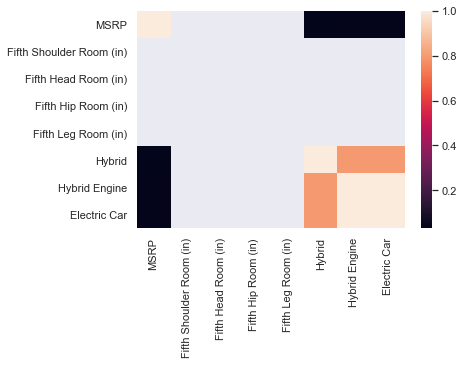

In [30]:
sns.heatmap(cormat);